

---



---


### Libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from zipfile import ZipFile
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

### Fetch Data

In [2]:
# zip = ZipFile('drive/My Drive/Colab Notebooks/Leaves.zip', 'r')
# zip.extractall('/content/drive/MyDrive/Colab Notebooks/Plant Leaves/Unzip_Leaves')
# zip.close()

In [3]:
# path name
direc = "C:/Users/vinee/Leaves/Leaves"

# categories of flowers
categories = ['Anhui Barberry', "Beale's Barberry", 'Big-fruited Holly', 
              'Camphortree', 'Canadian Poplar', 'Castor Aralia', 
              'Chinese Cinnamon', 'Chinese horse chestnut', 'Chinese redbud', 
              'Chinese Toon', 'Chinese Tulip Tree', 'Crape myrtle', 'Deodar', 
              'Ford Woodlotus', 'Glossy Privet', 'Goldenrain Tree', 
              'Japan Arrowwood', 'Japanese Cheesewood', 'Japanese Flowering Cherry',
              'Japanese maple', 'Maidenhair Tree', 'Nanmu', 'Oleander', 'Peach',
              'Pubescent Bamboo', 'Southern Magnolia', 'Sweet Osmanthus', 'Tangerine',
              'Trident Maple', 'True Indigo', 'Wintersweet', 'Yew Plum Pine']

# categories = categories[:5]



### Preprocessing Data

In [4]:
image_width = 300
image_height = 300
image_size = (image_width,image_height)

def make_data():
  train=[]
  test=[]
  data=[]
  for category in categories:
    path = os.path.join(direc, category)
    label = categories.index(category)
    # data = []
    for img in os.listdir(path):
      img_path = os.path.join(path,img)
      
      try:
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, image_size)

        image = np.array(image, dtype=np.float64)

        data.append([image, label])
      except:
        pass
  np.random.shuffle(data)
#     np.random.shuffle(data)
#     train.extend(data[:int(len(data)*0.7)])
#     test.extend(data[int(len(data)*0.7):])

    # items.append(len(os.listdir(path)))

  pik = open("C:/Users/vinee/Leaves/data.pickle", 'wb')
  pickle.dump(data, pik)
  pik.close()  

#   pik = open('C:\\Users\vinee\Leaves\train_data.pickle', 'wb')
#   pickle.dump(train, pik)
#   pik = open('C:\\Users\vinee\Leaves\test_data.pickle', 'wb')
#   pickle.dump(test, pik)
#   pik.close()

# make_data()

### Train and Test Data

In [5]:
def load_data(direc):
  pick = open(direc, 'rb')
  data = pickle.load(pick)
  pick.close()
  
  np.random.shuffle(data)
  
  feature = []
  labels = []

  for img,label in data:
    feature.append(img)
    labels.append(label)

  feature = np.array(feature, dtype=np.float64)
  labels = np.array(labels)

  feature /= 255.0

  return [feature, labels]

In [6]:
# (x_train, y_train) = load_data('C:/Users/vinee/Leaves/train_data.pickle')
# (x_test, y_test) = load_data('C:/Users/vinee/Leaves/test_data.pickle')

(feature, labels) = load_data('C:/Users/vinee/Leaves/data.pickle')

In [7]:
(x_train, x_test, y_train, y_test) = train_test_split(feature, labels, test_size=0.2)

### Data Augmentation

In [8]:
datagen = ImageDataGenerator(
        rotation_range = 45,
        # shear_range = 0.2,
        # zoom_range = 0.2,
        height_shift_range = 0.2,
        width_shift_range = 0.2,
        fill_mode = "nearest",
        rescale=1./255,
        horizontal_flip = True,
        vertical_flip = True)
        # brightness_range = (0.5, 1.5))

In [9]:
batch_size=32

it = datagen.flow(x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1), y_train, batch_size=batch_size)
# # it = datagen.flow(feature.reshape(feature.shape[0], feature.shape[1], feature.shape[2], 1), labels, batch_size=20)

### Building Model

In [10]:
input_layer = tf.keras.Input([image_width, image_height,1])

conv1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5),padding='Same', 
                                 activation='relu')(input_layer)

# conv1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5),padding='Same', 
#                                  activation='relu')(conv1)

# conv1 = tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5),padding='Same', 
#                                  activation='relu')(conv1)

pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv1)

# drop1 = tf.keras.layers.Dropout(0.2)(pool1)

conv2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same',
                               activation='relu')(pool1)
                               
# conv2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same',
#                                activation='relu')(conv2)

# conv2 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='Same',
#                                activation='relu')(conv2)

pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(conv2)

# drop2 = tf.keras.layers.Dropout(0.2)(pool2)

conv3 = tf.keras.layers.Conv2D(filters=96, kernel_size=(3,3), padding='Same',
                               activation='relu')(pool2)

# conv3 = tf.keras.layers.Conv2D(filters=96, kernel_size=(3,3), padding='Same',
#                                activation='relu')(conv3)

# conv3 = tf.keras.layers.Conv2D(filters=96, kernel_size=(3,3), padding='Same',
#                                activation='relu')(conv3)

pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(conv3)

# drop3 = tf.keras.layers.Dropout(0.2)(pool3)

conv4 = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='Same',
                               activation='relu')(pool3)

pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2))(conv4)                             

flt1 =tf.keras.layers.Flatten()(pool4)

dn1 = tf.keras.layers.Dense(512, activation='relu')(flt1)
# kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
#     bias_regularizer=regularizers.l2(1e-4),
#     activity_regularizer=regularizers.l2(1e-5),

drop4 = tf.keras.layers.Dropout(0.3)(dn1)

dn2 = tf.keras.layers.Dense(512,activation='relu')(drop4)
# kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),
#     bias_regularizer=regularizers.l2(1e-4),
#     activity_regularizer=regularizers.l2(1e-5),

drop5 = tf.keras.layers.Dropout(0.3)(dn2)

out = tf.keras.layers.Dense(32, activation='softmax')(drop5)

In [11]:
model = tf.keras.Model(input_layer, out)

In [15]:
pip install pydot

In [18]:
from keras.utils.vis_utils import plot_model
plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 300, 300, 32)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 96)        55392 

In [19]:
# from keras.applications.vgg19 import VGG19
# base_model = VGG19(input_shape = (x_train.shape[1], x_train.shape[2], 1), include_top=False, weights=None)
# for layer in base_model.layers:
#   layer.trainable = False

In [20]:
# x = tf.keras.layers.Flatten()(base_model.output)
# x = tf.keras.layers.Dense(4096, activation='relu')(x)
# x = tf.keras.layers.Dropout(0.5)(x)
# x = tf.keras.layers.Dense(4096, activation='relu')(x)
# x = tf.keras.layers.Dropout(0.5)(x)
# predictions = tf.keras.layers.Dense(32, activation='softmax')(x)

In [21]:
# model = tf.keras.Model(inputs = base_model.input, outputs = predictions)

In [22]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
earlystopping = EarlyStopping(
    monitor = 'val_accuracy',
    patience = 5,
    restore_best_weights=False)

# mcp_save = ModelCheckpoint(
#     '/content/mdl_wts.hdf5', 
#     save_best_only=True, 
#     monitor='loss', 
#     mode='min')

rlrop = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.3, 
    patience=2)

In [27]:
history = model.fit(x_train,y_train,
          # steps_per_epoch=len(x_train) // batch_size,
          epochs=100, 
          validation_data=(x_test,y_test),
          callbacks=[earlystopping, rlrop]) # mcp_save,

Epoch 1/100
48/48 [==============================] - 100s 2s/step - loss: 1.6879 - accuracy: 0.4846 - val_loss: 1.0701 - val_accuracy: 0.6832 - lr: 0.0010
Epoch 2/100
48/48 [==============================] - 110s 2s/step - loss: 0.9684 - accuracy: 0.7082 - val_loss: 0.6981 - val_accuracy: 0.7592 - lr: 0.0010
Epoch 3/100
48/48 [==============================] - 103s 2s/step - loss: 0.6875 - accuracy: 0.7902 - val_loss: 0.5902 - val_accuracy: 0.8272 - lr: 0.0010
Epoch 4/100
48/48 [==============================] - 100s 2s/step - loss: 0.5079 - accuracy: 0.8348 - val_loss: 0.4817 - val_accuracy: 0.8796 - lr: 0.0010
Epoch 5/100
48/48 [==============================] - 101s 2s/step - loss: 0.3939 - accuracy: 0.8728 - val_loss: 0.4232 - val_accuracy: 0.8639 - lr: 0.0010
Epoch 6/100
48/48 [==============================] - 110s 2s/step - loss: 0.2955 - accuracy: 0.9023 - val_loss: 0.5624 - val_accuracy: 0.8482 - lr: 0.0010
Epoch 7/100
48/48 [==============================] - 104s 2s/step - lo

In [ ]:
# from keras.models import load_model
# model1 = load_model('/content/mdl_wts.hdf5')

In [ ]:
# history.history.keys()

In [30]:
model.evaluate(x_train, y_train,verbose=1)

48/48 [==============================] - 24s 498ms/step - loss: 0.0027 - accuracy: 1.0000


[0.0026618903502821922, 1.0]

In [29]:
model.evaluate(x_test, y_test,verbose=1)

12/12 [==============================] - 6s 493ms/step - loss: 0.2890 - accuracy: 0.9293


[0.28895536065101624, 0.9293193817138672]

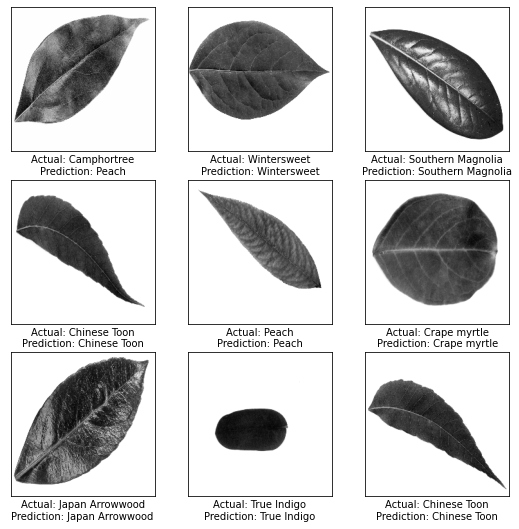

In [ ]:
predict = model.predict(x_test)

plt.figure(figsize=(9,9))

for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_test[i], cmap='gray')
  plt.xlabel("Actual: "+categories[y_test[i]]+"\nPrediction: "+
    categories[np.argmax(predict[i])])
  plt.xticks([])
  plt.yticks([])

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("drive/My Drive/Colab Notebooks/model.tflite","wb").write(tflite_model)

In [28]:
model.save('model.h5')

In [8]:
from keras.models import load_model
model = load_model('model.h5')